In [1]:
# Library imports (see /Utilities/setup_env.py for full import list and figure setup)

from pathlib import Path
import sys

repo_root = Path.cwd().parents[1]  # .../Figure_analysis
repo_root = repo_root.parent       # repo root
sys.path.insert(0, str(repo_root))

from Figure_analysis.Utilities.setup_env import *

In [2]:
# Define color map

colors = ["#0f4c5c", "#ecf39e", "#9a031e"]
custom_cmap = LinearSegmentedColormap.from_list("black_blue_gold", colors)


def get_text_color(rgb, threshold=0.5):
    r, g, b = rgb[:3]  # RGB tuple between 0 and 1
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return 'white' if luminance < threshold else 'black'

def plot_structure_data(df_toplot, figsize, out_file = ''):
    fig, ax = plt.subplots(figsize=figsize)

    for i, row in df_toplot.iterrows():
        x, y = row['x'], row['y']
        base = row['nt']
        dG = row['dG']
        
        if dG == -999:
            facecolor = 'white'
            edgecolor = 'black'
            textcolor = 'black'
        else:
            # Optional: use a colormap for continuous dG coloring
            # Here we map dG from blue (stable) to red (unstable)

            norm = mcolors.Normalize(vmin=-1,
                                        vmax=4)
            cmap = plt.get_cmap('magma_r')
            cmap = custom_cmap
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            facecolor = cmap(norm(dG))
            edgecolor = 'black'
            textcolor = get_text_color(facecolor)

        ax.scatter(x, y, s=300, facecolors=facecolor, edgecolors=edgecolor, linewidths=1)
        ax.annotate(f"{base}", (x, y), fontsize=12, ha='center', va='center', color=textcolor, fontweight='bold')

    ax.axis('equal')
    ax.grid(False)
    ax.axis('off')

    fig.colorbar(sm, ax=ax, orientation='vertical', label='ΔG (kcal/mol)')
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

In [ ]:
# Prepare data

df_WT = pd.read_csv('RNApuzzler_coords/hiv_WT.csv')
df_WT['site'] = df_WT.index + 1

dG_data = pd.read_csv('../HIV_dG_Barplot/hiv_WT_dG.csv')

# Merge on df_WT and df_A8C which contains all sites
df_WT = df_WT.merge(dG_data[['site_num', 'dG']], left_on='site', right_on = 'site_num', how='left')
df_WT['dG'] = df_WT['dG'].fillna(-999) # this is for sites with no data

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


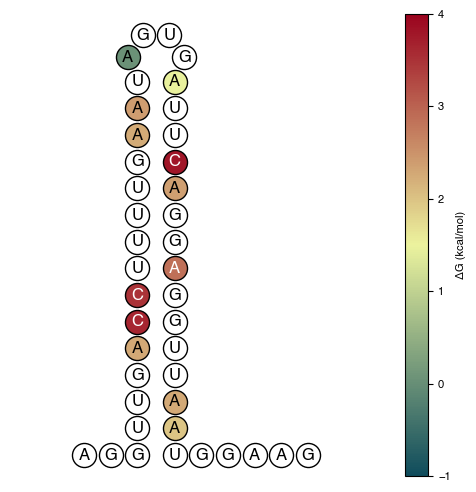

In [4]:
plot_structure_data(df_A8C, (6,6), 'fourU_A8C.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


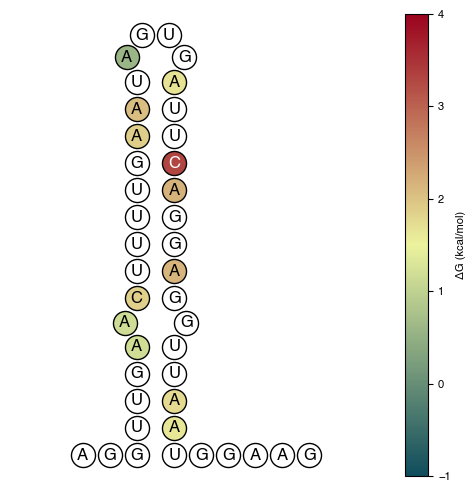

In [5]:
plot_structure_data(df_WT, (6,6), 'fourU_WT.pdf')